# Assignment 2

## Overview
In this assignment, the focus is on using the RT-IoT2022 cybersecurity dataset to explore applied machine learning techniques for intrusion detection in IoT systems. The dataset, introduced by Sharmila et al. (2023), captures adversarial and normal network behaviors using over 80 variables derived from IoT devices such as Amazon Alexa and Raspberry Pi, as well as simulated attacks like DDoS and ARP poisoning. These features include metrics like packet counts, flow durations, payload sizes, and TCP/IP-specific flags.

The previous paper highlights the datasets sources, current research, and importance of this kind of workl.

## Initial Data Reading, Imports and Processing
We will begin by importing some libraries that we will use throughout the analysis and then subsequently import the dataset and show a short preview of what the head of the dataset looks like.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

file_path = '/Users/tejaleburu/Desktop/RT_IOT2022.csv'
data = pd.read_csv(file_path)
data.drop(columns=['id.orig_p', 'id.resp_p', 'Unnamed: 0'], inplace=True, errors='ignore')
data.dropna(inplace=True)
data.head()

,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,tcp,mqtt,32.011598,9,5,3,3,0.281148,0.156193,0.437341,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,tcp,mqtt,31.883584,9,5,3,3,0.282277,0.156821,0.439097,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,tcp,mqtt,32.124053,9,5,3,3,0.280164,0.155647,0.435811,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,tcp,mqtt,31.961063,9,5,3,3,0.281593,0.156440,0.438033,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,tcp,mqtt,31.902362,9,5,3,3,0.282111,0.156728,0.438839,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


## Exploratory Data Analysis, Preprocessing, and Visuals

### Visual 1 - Bar Plots and Pie Charts

In this visual, we will look at the distribution and number of rows that are for each attack type.

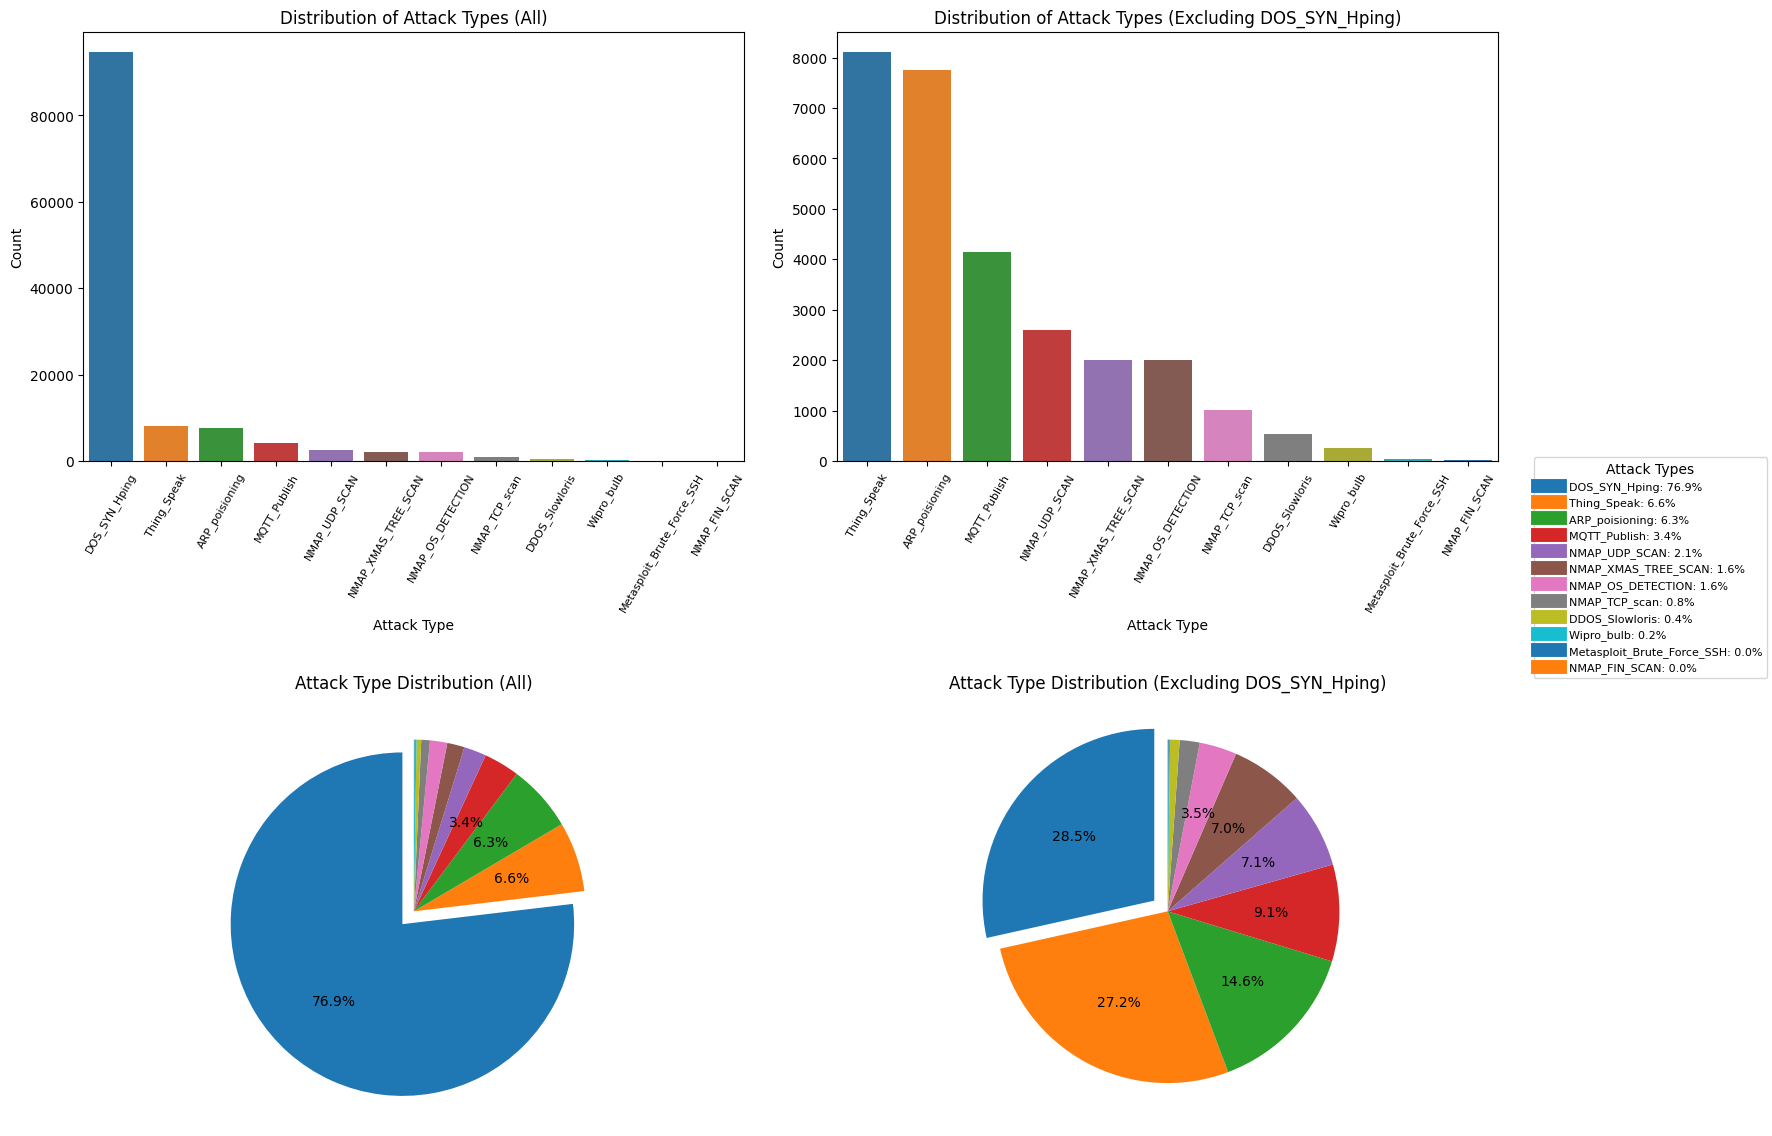

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filtered_data = data[data['Attack_type'] != "DOS_SYN_Hping"]

color_palette = sns.color_palette("tab10", n_colors=data['Attack_type'].nunique())

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.countplot(
    x='Attack_type',
    data=data,
    ax=axes[0, 0],
    order=data['Attack_type'].value_counts().index,
    palette=color_palette
)
axes[0, 0].set_title('Distribution of Attack Types (All)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=60, labelsize=8)
axes[0, 0].set_xlabel('Attack Type', fontsize=10)
axes[0, 0].set_ylabel('Count', fontsize=10)

sns.countplot(
    x='Attack_type',
    data=filtered_data,
    ax=axes[0, 1],
    order=filtered_data['Attack_type'].value_counts().index,
    palette=color_palette
)
axes[0, 1].set_title('Distribution of Attack Types (Excluding DOS_SYN_Hping)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=60, labelsize=8)
axes[0, 1].set_xlabel('Attack Type', fontsize=10)
axes[0, 1].set_ylabel('Count', fontsize=10)


def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 3 else ''

all_counts = data['Attack_type'].value_counts()
all_percentages = all_counts / all_counts.sum() * 100
all_counts.plot.pie(
    autopct=autopct_format,
    startangle=90,
    ax=axes[1, 0],
    explode=[0.1] + [0] * (len(all_counts) - 1),
    colors=color_palette,
    legend=False,
    labels=None
)
axes[1, 0].set_ylabel('')
axes[1, 0].set_title('Attack Type Distribution (All)', fontsize=12)

filtered_counts = filtered_data['Attack_type'].value_counts()
filtered_percentages = filtered_counts / filtered_counts.sum() * 100
filtered_counts.plot.pie(
    autopct=autopct_format,
    startangle=90,
    ax=axes[1, 1],
    explode=[0.1] + [0] * (len(filtered_counts) - 1),
    colors=color_palette[:len(filtered_counts)],
    legend=False,
    labels=None
)
axes[1, 1].set_ylabel('')
axes[1, 1].set_title('Attack Type Distribution (Excluding DOS_SYN_Hping)', fontsize=12)

handles = [plt.Line2D([0], [0], color=color, lw=10) for color in color_palette]
labels = [
    f'{attack_type}: {percent:.1f}%' for attack_type, percent in zip(all_counts.index, all_percentages)
]
fig.legend(handles, labels, loc='center right', title='Attack Types', fontsize=8, title_fontsize=10)

plt.tight_layout(pad=3)
plt.subplots_adjust(right=0.85)  # Make room for the legend
plt.show()


As mentioned in the prior homework, one problem we frequently see with the cyber security data sets is data imbalance, note here that we see that the distribution of the attack type is biased toward the ping attack type and some attacks are represented in such small fraction that they represnt ~0% of the dataset. In the future assignments, we should consider resampling or combining categories to improve the accuracy of the model that we create. The dataset without the pings is more balanced but likely not enough to discount the benefits of balancing the dataset. For the sake of some visual clarity, we have made a legend for convenience. 

## Visual 2 - Numerical Variables Heatmap

/var/folders/4x/0z62fjts5fj7l2x4j01v_2vw0000gn/T/ipykernel_34718/525681319.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


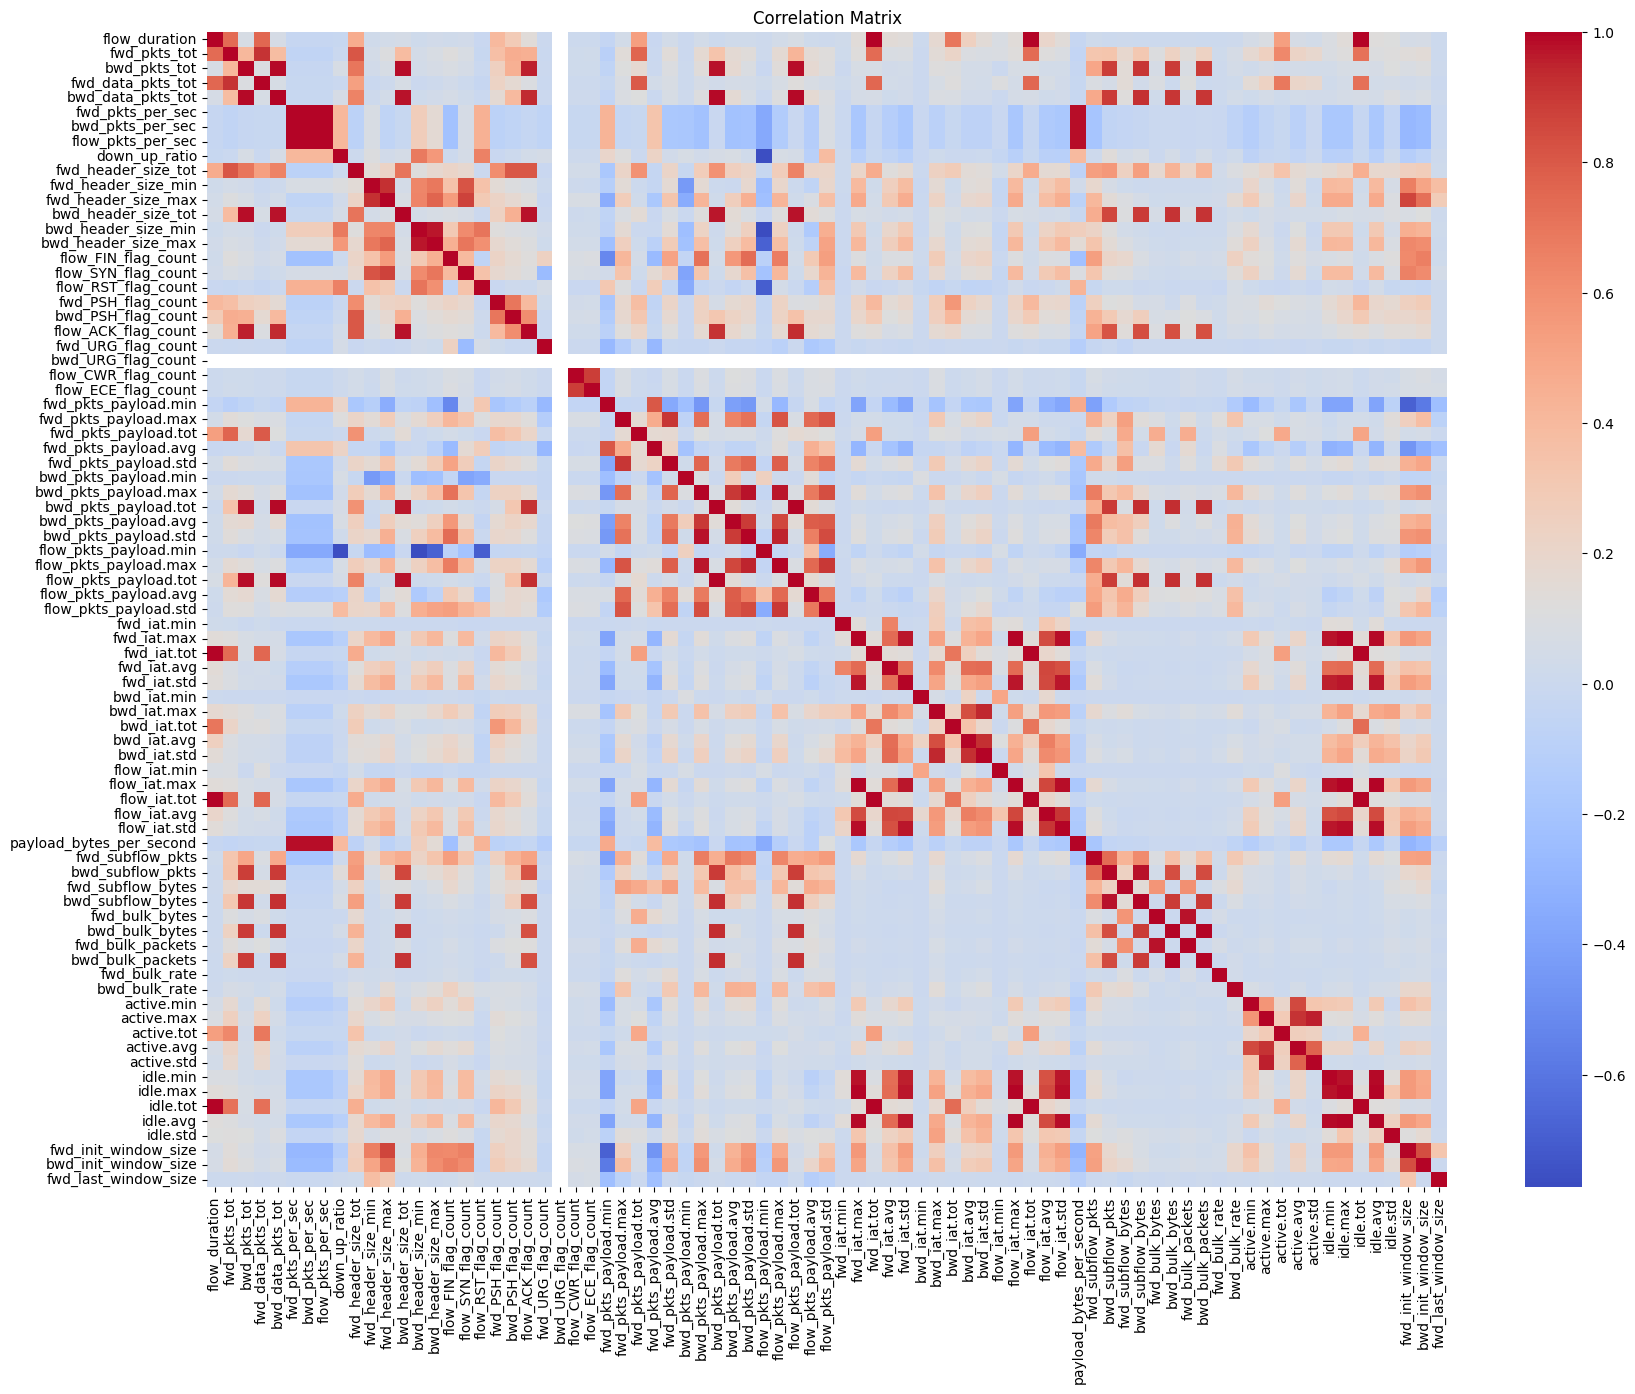

In [16]:
corr = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

This heatmap of all of the numerical variables shows us some key insights about the data, notably that many of the indepedent vairables are highly (either postively in dark red or negatively dark blue) correlated -- this can make them redundant. Highly correlated variables can create multicollinearly which could hurt model performance, not to mention including this many variables could frankly cause the model to not converage. In this case, for example, fwd_pkts_tot and bwd_pkts_tot, and flow_duration all seem to be highly correlated. We many have to rely on some feature selection to reduce the number of relevant variables we should use. 

### Visual 3 - Categorical Pivot Table Heatmap

Index(['proto', 'service', 'Attack_type'], dtype='object')


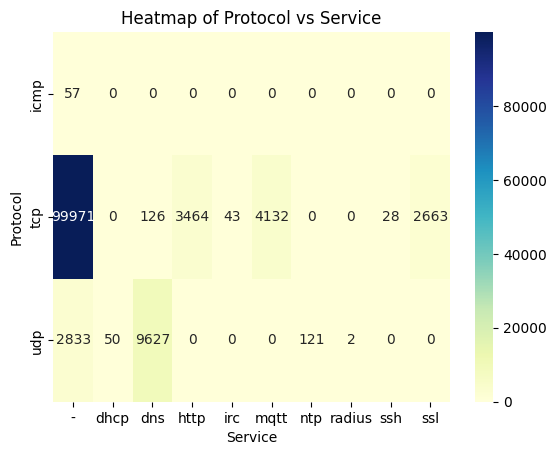

In [17]:
print(data.select_dtypes(include='object').columns)
pivot_table = data.pivot_table(index='proto', columns='service', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Protocol vs Service')
plt.xlabel('Service')
plt.ylabel('Protocol')
plt.show()

Here, we see that we have two categorical predictor variables in the dataset, service and protocal, but it is once again, similar to attack type, highly imbalanced. TCP with no service nominations the dataset and this creates a dataset imbalance also on the feature side. The model we create may perform poorly with UDP or ICMP based attacks because in proportion we have not seen enough of them. 

## Logistic Regression

### Code

/Users/tejaleburu/anaconda3/envs/default/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


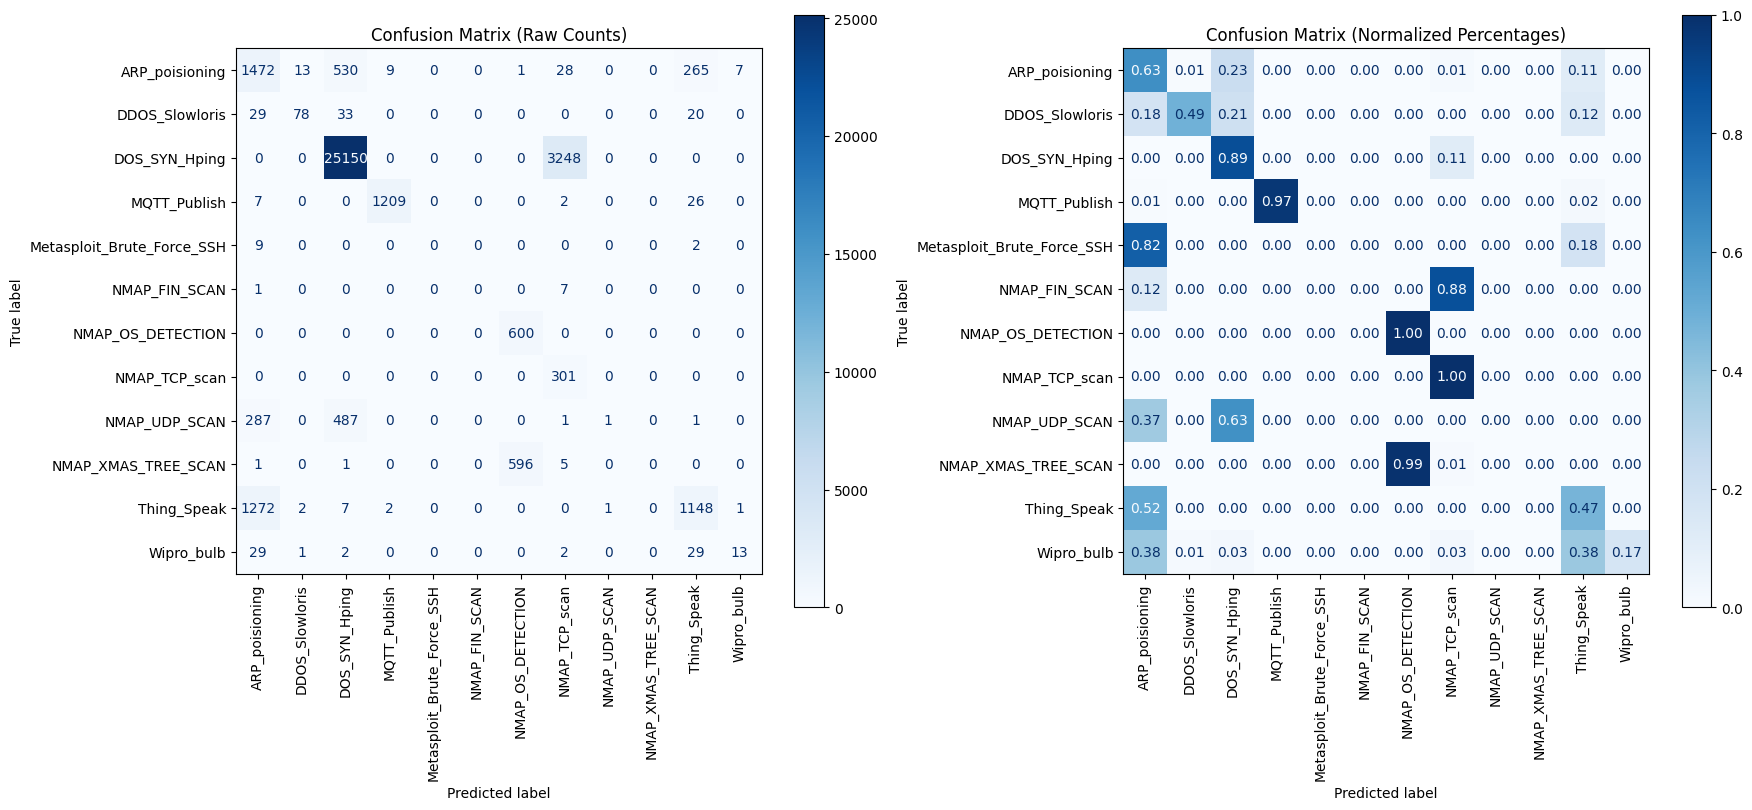

Classification Report:


/Users/tejaleburu/anaconda3/envs/default/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                            precision    recall  f1-score   support

            ARP_poisioning       0.47      0.63      0.54      2325
            DDOS_Slowloris       0.83      0.49      0.61       160
             DOS_SYN_Hping       0.96      0.89      0.92     28398
              MQTT_Publish       0.99      0.97      0.98      1244
Metasploit_Brute_Force_SSH       0.00      0.00      0.00        11
             NMAP_FIN_SCAN       0.00      0.00      0.00         8
         NMAP_OS_DETECTION       0.50      1.00      0.67       600
             NMAP_TCP_scan       0.08      1.00      0.15       301
             NMAP_UDP_SCAN       0.50      0.00      0.00       777
       NMAP_XMAS_TREE_SCAN       0.00      0.00      0.00       603
               Thing_Speak       0.77      0.47      0.59      2433
                Wipro_bulb       0.62      0.17      0.27        76

                  accuracy                           0.81     36936
                 macro avg       0.48      0.4

/Users/tejaleburu/anaconda3/envs/default/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tejaleburu/anaconda3/envs/default/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = data.drop(columns=['Attack_type'])
y = data['Attack_type']

X = pd.get_dummies(X, columns=['proto', 'service'], drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

conf_matrix_raw = confusion_matrix(y_test, y_pred)

# Compute confusion matrix (Percentages)
conf_matrix_normalized = conf_matrix_raw.astype(np.float64) / conf_matrix_raw.sum(axis=1, keepdims=True)

# Create figure for side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Display raw confusion matrix
disp_raw = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_raw, display_labels=model.classes_)
disp_raw.plot(cmap="Blues", ax=axes[0], values_format="d")  # Raw values as integers
axes[0].set_title("Confusion Matrix (Raw Counts)")
axes[0].tick_params(axis='x', rotation=90)

# Display normalized confusion matrix
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=model.classes_)
disp_normalized.plot(cmap="Blues", ax=axes[1], values_format=".2f")  # Percentages formatted to 2 decimal places
axes[1].set_title("Confusion Matrix (Normalized Percentages)")
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout for readability
plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

### Initial Analysis 

Note first the warning given by the system, that the optimization algorithm failed to converge. This means that even with 500 iterations the algorithm couldnt find aa stable minimum. This leaves us likely a fairly poor model. There are many reasons this can happen in the abstract but some issues as mentioned earlier could be referenced here, feature scaling issues (some values being in range of 1-10, while others nmuch larger) -- we may need to use something like StandardScaler(). There are also as mentioned above an extremely high dimension dataset, we may need to implement feature reduction, and as noted on the heatmap there may be some multicollinearity issues. All of this results in a pittance accuracy rate of 81%, as shown in the report. We see that in the confusion matrix that there is a considerable amount of misclassification going on, for example, in the case of ARP Poisoning, we are very inconsistent. 

## Iterative Logisitic Regression and Feature Selection

### Feature Selection
To start with some baseline improvements, lets add in a feature selector. In this case, we will use mutual_info_classif which is a sk learn method that leverages non-parametric methods that estimates a mutual information for discrete target variables. We will use this method to obtain the 20 best features. 

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Apply Mutual Information
mi_selector = SelectKBest(mutual_info_classif, k=20)  # Select top 20 features
X_selected = mi_selector.fit_transform(X, y)

# Get selected feature names
selected_features = mi_selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features]
print("Selected Features:", selected_feature_names)



Selected Features: Index(['flow_duration', 'fwd_pkts_per_sec', 'flow_pkts_per_sec',
       'fwd_header_size_tot', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'flow_pkts_payload.max',
       'flow_pkts_payload.tot', 'flow_pkts_payload.avg',
       'flow_pkts_payload.std', 'flow_iat.max', 'flow_iat.tot',
       'fwd_subflow_bytes', 'active.max', 'active.tot', 'active.avg',
       'fwd_init_window_size', 'fwd_last_window_size'],
      dtype='object')


### Iterative Logistic Regression and Accuracy vs Complexity Graph

We will now use the reduced features to create (hopefully) a more accurate model. 

[0.7749350227420403, 0.776667749620966, 0.7767218973359324, 0.8063406974225688, 0.9361869179120641, 0.9444985921594109, 0.9453920294563569, 0.9444444444444444, 0.9468269439029673, 0.9468540177604505, 0.9456898418886723, 0.9502653238033355, 0.950454840805718, 0.9506714316655838, 0.950211176088369, 0.9524583062594758, 0.9525124539744423, 0.9533517435564219, 0.9593892137751787]


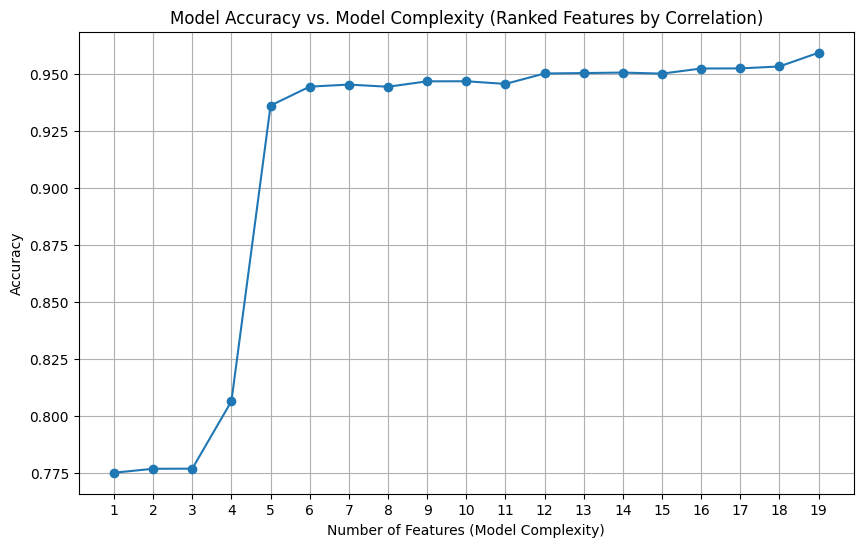

In [20]:
ranked_features = selected_feature_names

accuracy_scores = []
scaler = StandardScaler()

for i in range(1, 20):
    X_subset = X[ranked_features[:i]].copy()

    X_subset_scaled = scaler.fit_transform(X_subset)

    X_train, X_test, y_train, y_test = train_test_split(
        X_subset_scaled, y, test_size=0.3, random_state=42, stratify=y
    )

    model = LogisticRegression(max_iter=500, random_state=42)
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)
    accuracy_scores.append(accuracy)

print(accuracy_scores)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), accuracy_scores, marker='o')
plt.xticks(range(1, 20))
plt.xlabel("Number of Features (Model Complexity)")
plt.ylabel("Accuracy")
plt.title("Model Accuracy vs. Model Complexity (Ranked Features by Correlation)")
plt.grid()
plt.show()

As shown above, once we increase the complexity, the model sees a quick jump in accuracy and eventually tapers around 96%. This somewhat follows the expected path, generally the models starts off inaccurate, jumping in accuracy after 3 features until 6 features, then appears to be ralatively stable after that! Note that here we also do not see the convergance issues as see in the high dimensionality model.